In [1]:
# Question 1: What is the most common name in the social network and how many people share it?

In [2]:
#Importing pandas library to do data operations like analysis and manipulations on given data frame

import pandas as pd
#Reading user table as 'dfu' by using pandas library and creating dfu dataframe(read_csv is an important pandas function to read csv files and do operations on it.)
dfu = pd.read_csv('user_table.csv')
#Displying top 5 rows of user table
dfu.head(5)

,Surname,Name,Age,Subscription Date
0,Smith,Sarah,30,1588157373
1,Picard,Francine,32,1588161732
2,Roth,Hans,40,1588157337
3,Pomme,Ali,28,1588165636
4,Di Lillo,Jordi,42,1588156042


In [3]:
#Creating a new column to show the fullnames (Name and surname)

dfu['Full name'] = dfu['Name'] +'_' + dfu['Surname']

dfu.head(5)


,Surname,Name,Age,Subscription Date,Full name
0,Smith,Sarah,30,1588157373,Sarah_Smith
1,Picard,Francine,32,1588161732,Francine_Picard
2,Roth,Hans,40,1588157337,Hans_Roth
3,Pomme,Ali,28,1588165636,Ali_Pomme
4,Di Lillo,Jordi,42,1588156042,Jordi_Di Lillo


In [4]:
#Determining the common name and the people who share it by using value count

pd.value_counts(dfu['Full name']).head(2)

Josie_Bond      11
Thomas_Smith    10
Name: Full name, dtype: int64

In [5]:
n = 1
dfu['Full name'].value_counts()[:n].index.tolist() ##Cross cheching

['Josie_Bond']

In [6]:
dfu['Full name'].describe() #Cross cheching the answer again by using derscribe 

count           1000
unique           246
top       Josie_Bond
freq              11
Name: Full name, dtype: object

# Question 1 answer: Josie Bond is the most common name with 11 people        sharing it

In [7]:
# Question2: List the five people with the most posts and reactions combined

In [8]:
#Reading posts and reactions and user  table by using pandas 

dfp = pd.read_csv('posts_table.csv')

display (dfp.head(5))

,User,Post Type,Post Date
0,1,Image,1588166977
1,1,Status_Change,1588167686
2,1,Text,1588168633
3,1,Image,1588163570
4,1,Image,1588168986


In [9]:
dfr = pd.read_csv('reactions_table.csv')

display (dfr.head(5))

,User,Reaction Type,Reaction Date
0,3741,Comment,1588168107
1,711,Emoticon,1588166846
2,701,Emoticon,1588163334
3,4750,Emoticon,1588168182
4,656,Comment,1588162272


In [10]:
#Reindexing the user column in the user table so as to make a common column to successfully combine user table with posts and reactions table,
#this will avoid duplicate values in table while combining tables

dfu = pd.read_csv('user_table.csv')
dfu.index.name = 'User'
dfu.index +=1 #Increase the index count
dfu.head(5)


,Surname,Name,Age,Subscription Date
User,,,,
1,Smith,Sarah,30,1588157373
2,Picard,Francine,32,1588161732
3,Roth,Hans,40,1588157337
4,Pomme,Ali,28,1588165636
5,Di Lillo,Jordi,42,1588156042


In [11]:
#creating a new data frame by merging the user table and post table with respect to the common user column
#Merging” two datasets is the process of bringing two datasets together into one, and aligning the rows from each based on common attributes or columns
df1 = pd.merge(dfu, dfp, on='User', how='outer') 
df1


,User,Surname,Name,Age,Subscription Date,Post Type,Post Date
0,1,Smith,Sarah,30,1588157373,Image,1588166977
1,1,Smith,Sarah,30,1588157373,Status_Change,1588167686
2,1,Smith,Sarah,30,1588157373,Text,1588168633
3,1,Smith,Sarah,30,1588157373,Image,1588163570
4,1,Smith,Sarah,30,1588157373,Image,1588168986
...,...,...,...,...,...,...,...
13153,1000,Thronton,Franz,28,1588171183,Video,1588167641
13154,1000,Thronton,Franz,28,1588171183,Image,1588162930
13155,1000,Thronton,Franz,28,1588171183,Gif,1588164214
13156,1000,Thronton,Franz,28,1588171183,Video,1588163573


In [12]:
#combining the new data frame (df1) with reactions table and creating a new column for counting posts and reactions combined

df2 = df1.append(dfr)  #The append() method in python adds a single item to the existing list. It doesn't return a new list of items but will modify the original list by adding the item to the end of the list
df2['Posts and Reactions'] = ''
df2 = df2.groupby(['User']).count() #Using groupby and value_counts we can count the number of activities each person did
df2

C:\Users\Vasu Tammisetti\Miniconda3\envs\py3k\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,Age,Name,Post Date,Post Type,Reaction Date,Reaction Type,Subscription Date,Surname,Posts and Reactions
User,,,,,,,,,
1,18,18,18,18,0,0,18,18,18
2,11,11,11,11,0,0,11,11,11
3,13,13,13,13,0,0,13,13,13
4,15,15,15,15,0,0,15,15,15
5,10,10,10,10,0,0,10,10,10
...,...,...,...,...,...,...,...,...,...
8727,0,0,0,0,121,121,0,0,121
8729,0,0,0,0,98,98,0,0,98
8948,0,0,0,0,135,135,0,0,135


In [13]:
#determining the five users with the most post and reactions combined.
#sort_values in particula order
Result = pd.merge(dfu,df2[['Posts and Reactions']], on='User', how='outer').sort_values('Posts and Reactions', ascending=False)
Result.head(5)

,Surname,Name,Age,Subscription Date,Posts and Reactions
User,,,,,
642,Mueller,Ali,5.0,1.588145e+09,241
664,Picard,Zoe,46.0,1.588161e+09,154
67,Gwahsi,Agaba,51.0,1.588156e+09,151
678,Kirk,Andreas,28.0,1.588156e+09,150
653,Kirk,Alok,18.0,1.588159e+09,148


# Question 2 answer: Users those have the most posts and reactions are
# user 642 - 241 posts
# user  664 - 154 posts
# user  67 -  151 posts
# user  678 - 150 posts
# user  653 - 148 posts

In [14]:
#Question 3: Create a plot of the friendship graph for all users named „Jean-Luc Picard“ (up to degree 2)

In [15]:
a = pd.read_csv('user_table.csv')
a.head()

,Surname,Name,Age,Subscription Date
0,Smith,Sarah,30,1588157373
1,Picard,Francine,32,1588161732
2,Roth,Hans,40,1588157337
3,Pomme,Ali,28,1588165636
4,Di Lillo,Jordi,42,1588156042


In [16]:
a['Full name']=a['Surname']+a['Name']
a.head()

,Surname,Name,Age,Subscription Date,Full name
0,Smith,Sarah,30,1588157373,SmithSarah
1,Picard,Francine,32,1588161732,PicardFrancine
2,Roth,Hans,40,1588157337,RothHans
3,Pomme,Ali,28,1588165636,PommeAli
4,Di Lillo,Jordi,42,1588156042,Di LilloJordi


In [17]:
a.loc[a['Full name']=='Jean-luc Picard']

,Surname,Name,Age,Subscription Date,Full name


In [18]:
a.loc[a['Name']=='Jean-luc Picard']

,Surname,Name,Age,Subscription Date,Full name


In [19]:
a.loc[a['Surname']=='Jean-luc Picard']

,Surname,Name,Age,Subscription Date,Full name


In [20]:
a.loc[a['Surname']=='Picard'].head()

,Surname,Name,Age,Subscription Date,Full name
1,Picard,Francine,32,1588161732,PicardFrancine
8,Picard,Robert,39,1588158173,PicardRobert
21,Picard,Jordi,35,1588152398,PicardJordi
29,Picard,Andreas,21,1588160223,PicardAndreas
46,Picard,Sarah,23,1588161552,PicardSarah


In [21]:
a.loc[a['Name']=='Picard'].head()

,Surname,Name,Age,Subscription Date,Full name


In [30]:
#To find the userids of Jean-Luc Picard using the users table create a new data frame to display specific information

userid = dfu.drop(columns = ['Subscription Date', 'Age']).loc[(dfu['Name'] == "Jean-Luc") & (dfu['Surname'] == "Picard")]
userid

,Surname,Name
User,,


# Answer for 3rd question is

# I did not find any name like Jean-luc Picard in user table so I could not find out friendship graph for the user

In [36]:
#But I tried with different user to find friendship graph.
#To find the userids of particular names using the users table
 

userid = dfu.drop(columns = ['Subscription Date', 'Age']).loc[(dfu['Name'] == "Hans") & (dfu['Surname'] == "Roth")]
userid

,Surname,Name
User,,
3,Roth,Hans
32,Roth,Hans
956,Roth,Hans


In [37]:
#To select friends of a particular userid
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

friends = pd.read_csv('friends_table.csv')

#Creating the friends list up to first degree
frnd1 = friends[(friends['Friend 1'].eq(3))] 
frnd1

,Friend 1,Friend 2
17,3,71
18,3,705
19,3,695
20,3,729
21,3,608
22,3,508
23,3,802
24,3,775
25,3,902
26,3,744


In [38]:
#Creating the friends list of up to second degree
frnd2 = friends[(friends['Friend 1'].eq(3)) | (friends['Friend 1'].eq(71)) | (friends['Friend 1'].eq(705)) | (friends['Friend 1'].eq(695)) | (friends['Friend 1'].eq(729)) | (friends['Friend 1'].eq(144))]
frnd2

,Friend 1,Friend 2
17,3,71
18,3,705
19,3,695
20,3,729
21,3,608
...,...,...
6862,729,149
6863,729,381
6864,729,325
6865,729,417


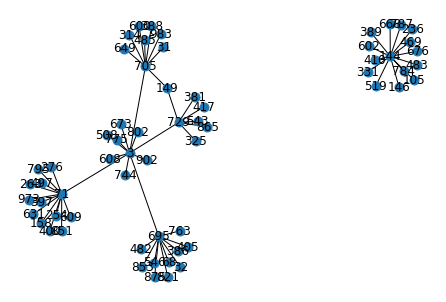

In [43]:
# creating the friendship graph of Hans's network
Hans=nx.from_pandas_edgelist(frnd2, 'Friend 1',  'Friend 2')
nx.draw(timothy, with_labels=True, node_size=80)
plt.show()

# To complete my work I reffered web sites  ' pandas series','Data schools(you tube) 'Stack overflow' and 'W3 schools'

Vasu Tammisetti
u34976